<a href="https://colab.research.google.com/github/armitakar/GGS366_Spatial_Computing/blob/main/Lectures/11_Object_oriented_programming_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the last lecture, we learned about the basic theories behind object oriented programming (OOP). In this lecture, we will show an example of it, in the context of spatial analysis.

# Example 1

Let’s start with a simple example. Suppose we want to print the speed, cost, and environmental impact associated with different modes of transportation, such as cars, bikes, trains, etc.

- To simplify the process, we can first define a parent class (*TransportMode*) that creates generic transportation mode objects with speed and cost attributes.

- This class also includes some basic methods, such as:

  - *verify_cost* and *verify_speed*: Verifying whether the cost and speed inputs are numeric and positive.

  - *print_info*: Printing general information about the transportation mode, provided the input values are valid.



In [45]:
# Parent class
class TransportMode:
    def __init__(self, name, speed, cost):
        self.name = name
        self._speed = speed        # Protected attribute (Example of encapsulation)
        self._cost = cost          # Protected attribute (Example of encapsulation)

    def verify_cost(self):
        # returns True if the following coditions are fulfilled else False
        return isinstance(self._cost, float) and self._cost > 0

    def verify_speed(self):
        # returns True if the following coditions are fulfilled else False
        return isinstance(self._speed, int) and self._speed > 0

    def print_info(self):
        # If the inputs are valid returns mode-specific information
        if self.verify_cost() == True and self.verify_speed()== True:
            return f"{self.name}: Speed {self._speed} and cost {self._cost}"
        else:
            return ("invalid input")

In [50]:
# Example object using TransportMode class
mode1 = TransportMode("Unknown", 40, 3.2)
print(mode1.verify_cost())
print(mode1.verify_speed())
print(mode1.print_info())

True
True
Unknown: Speed 40 and cost 3.2


In [51]:
# Example object using TransportMode class
# note that the cost argument is invalid, so it's not printing info.
mode2 = TransportMode("Unknown", 40, "$3.2")
print(mode2.verify_cost())
print(mode2.verify_speed())
print(mode2.print_info())

False
True
invalid input


Now, suppose we also want to include environmental impact (e.g., emission levels) for each transportation mode, which will vary across modes. To do this, we can create child classes (e.g., *Car*, *Bike*, *Train*) that inherit the properties of the parent class. Additionally, we can override the *print_info* method in each child class to include mode-specific emission levels in the output.


In [53]:
# Inherited classes (Inheritance + Polymorphism)
class Car(TransportMode):
    def print_info(self):
        if self.verify_cost() == True and self.verify_speed()== True:
            return f"{self.name}: Speed {self._speed}, cost {self._cost}, and Emissions = High"
        else:
            return ("invalid input")


class Bike(TransportMode):
    def print_info(self):
        if self.verify_cost() == True and self.verify_speed()== True:
            return f"{self.name}: Speed {self._speed}, cost {self._cost}, and Emissions = None"
        else:
            return ("invalid input")


class Train(TransportMode):
    def print_info(self):
        if self.verify_cost() == True and self.verify_speed()== True:
            return f"{self.name}: Speed {self._speed}, cost {self._cost}, and Emissions = Low"
        else:
            return ("invalid input")



# Create objects
car = Car("Sedan", 100, 0.5)
bike = Bike("Mountain Bike", 25, 0.05)
train = Train("Metro", 80, 0.2)

# Demonstrate polymorphism
for mode in (car, bike, train):
    print(mode.print_info())


Sedan: Speed 100, cost 0.5, and Emissions = High
Mountain Bike: Speed 25, cost 0.05, and Emissions = None
Metro: Speed 80, cost 0.2, and Emissions = Low


# Example 2

In [3]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.7 MB/s eta 0:00:00


In [5]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In this example, we bring everything together using real-world spatial network data. The goal is to build a flexible class system that allows us to calculate the shortest route between any two locations—either by walking or biking—within a user-defined study area, and using a custom travel speed.

Notice how this design combines multiple aspects of network analysis within a single structure using object-oriented programming (OOP) principles. Without OOP, this functionality would require repetitive and hard-to-maintain code scattered across multiple steps.

#### **Parent Class: TransportMode**
We first define a generic parent class called ***TransportMode***, which takes place_name and speed_kph as input. It also contains methods to:

- Load a network graph for the specified area and mode (***load_graph***). This method also takes a network_type argument (e.g., "walk" or "bike") so it can load the correct network from OSM.
- Access the graph internally (***get_graph***).
- Plot a calculated route on the map (***plot_route***).
- Calculate the shortest route between two coordinate points (***calculate_route***).


#### **Child Classes: Walking and Biking**
We then define two child classes, Walking and Biking, which inherit from the parent ***TransportMode*** class and automatically specify a default speed:
- Walking → 5 km/h
- Biking → 15 km/h

These child classes Call the parent method ***load_graph*** with the appropriate network type ("walk" or "bike") during initialization.

In [56]:
class TransportMode:
    def __init__(self, place_name, speed_kph):
        self.place_name = place_name
        self._speed_kph = speed_kph        # protected attribute
        self._graph = None                 # protected attribute

    def load_graph(self, network_type):
        print(f"Loading {network_type} network for {self.place_name}...")
        G = ox.graph_from_place(self.place_name, network_type=network_type)
        nx.set_edge_attributes(G, self._speed_kph, "speed_kph")
        G = ox.add_edge_travel_times(G)
        self.__graph = G
        print("Graph loaded successfully.")

    def get_graph(self):
        return self.__graph

    def plot_route(self, route):
        fig, ax = ox.plot_graph_route(self.__graph, route, route_linewidth=6, node_size=0, bgcolor="k")
        plt.show()

    def calculate_route(self, origin_point, destination_point):
        G = self.get_graph()
        orig_node = ox.nearest_nodes(G, origin_point[1], origin_point[0])
        dest_node = ox.nearest_nodes(G, destination_point[1], destination_point[0])
        return nx.shortest_path(G, orig_node, dest_node, weight="travel_time")


class Walking(TransportMode):
    def __init__(self, place_name, speed_kph=5):
        super().__init__(place_name, speed_kph)
        self.load_graph(network_type="walk")



class Biking(TransportMode):
    def __init__(self, place_name, speed_kph=15):
        super().__init__(place_name, speed_kph)
        self.load_graph(network_type="bike")





Here you can see usage of the class we just defined. First, we provide a *place_name*, along with an *origin* and *destination* (coordinates) to specify the study area and locations. We then create an object called *walk_mode* using the *Walking* class. Next, we call the c*alculate_route()* method to compute the walking route between the two locations. We also plot the route by calling the *plot_route()* method, both of which are inherited from the parent class *TransportMode*.

The same process is repeated for biking by defining a *bike_mode* object using the *Biking* class.



Loading walk network for Manhattan, New York, USA...
Graph loaded successfully.
Walking route calculated.


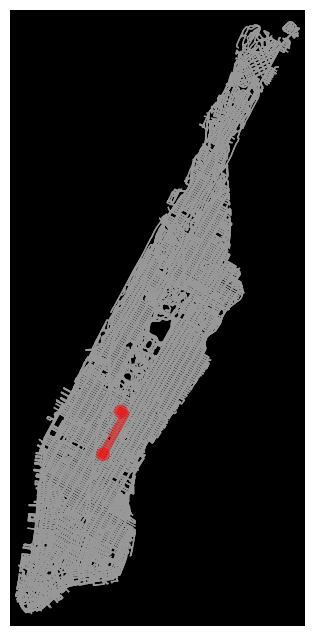

Loading bike network for Manhattan, New York, USA...
Graph loaded successfully.
Biking route calculated.


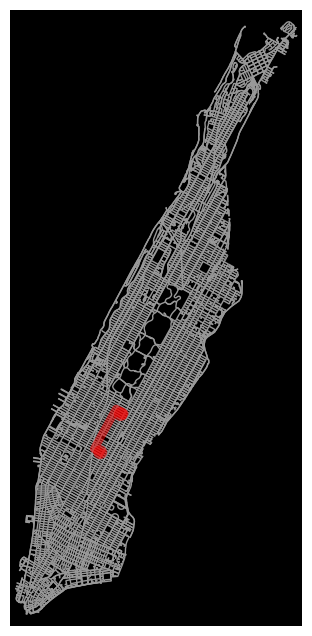

In [57]:
# Example usage

place_name = "Manhattan, New York, USA"
origin = (40.748817, -73.985428)       # Empire State Building
destination = (40.761436, -73.977621)  # Central Park South

# Walk
walk_mode = Walking(place_name)
walk_route = walk_mode.calculate_route(origin, destination)
print("Walking route calculated.")
walk_mode.plot_route(walk_route)

# Bike
bike_mode = Biking(place_name, speed_kph=18)
bike_route = bike_mode.calculate_route(origin, destination)
print("Biking route calculated.")
bike_mode.plot_route(bike_route)
